# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Faqih Zacky
- **Email:** mfaqihzacky@gmail.com
- **ID Dicoding:** mfaqihzacky

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda setiap harinya?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda setiap harinya?
- Seberapa besar jarak rasio perbandingan antara seseorang yang memilih untuk menyewa pada hari kerja dan hari libur?
- Kapan waktu penyewaan sepeda paling ramai dan sepi pengguna dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

#### Memuat Table Day

In [84]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

- **Terdapat 16 Kolom Data**
- **Beberapa Variabel Kolom:**

  1. **instant** digunakan sebagai record index.
  2. **dteday** digunakan sebagai tanggal.
  3. **season** digunakan sebagai musim:
     - 1: Spring
     - 2: Summer
     - 3: Fall
     - 4: Winter
  4. **yr** digunakan sebagai tahun:
     - 0: 2011
     - 1: 2012
  5. **mnth** digunakan sebagai bulan (1 hingga 12).
  6. **holiday** digunakan untuk menandai apakah hari tersebut merupakan hari libur atau tidak.
  7. **weekday** digunakan sebagai hari dalam seminggu.
  8. **workingday** digunakan untuk menandai apakah hari tersebut adalah hari kerja (bukan libur atau akhir pekan):
     - 1: Hari kerja
     - 0: Bukan hari kerja
  9. **weathersit** digunakan sebagai jenis cuaca:
      - 1: Clear, Few clouds, Partly cloudy
      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  10. **temp** digunakan sebagai suhu yang dinormalisasi dalam Celsius. Nilainya dibagi dengan 41 (maksimum).
  11. **atemp** digunakan sebagai suhu yang dirasakan atau "feels-like" yang dinormalisasi dalam Celsius. Nilainya dibagi dengan 50 (maksimum).
  12. **hum** digunakan sebagai kelembaban yang dinormalisasi. Nilainya dibagi dengan 100 (maksimum).
  13. **windspeed** digunakan sebagai kecepatan angin yang dinormalisasi. Nilainya dibagi dengan 67 (maksimum).
  14. **casual** digunakan untuk mencatat jumlah pengguna sepeda yang bersifat kasual (bukan terdaftar).
  15. **registered** digunakan untuk mencatat jumlah pengguna sepeda yang terdaftar.
  16. **cnt** digunakan untuk mencatat total jumlah penyewaan sepeda, termasuk pengguna kasual dan pengguna terdaftar.


- **Tidak ada duplicates data**
- **Tidak ada missing value**

#### Memuat Table Hour

In [85]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- **Terdapat 17 Kolom Data**
- **Beberapa Variabel Kolom:**

  1. **instant** digunakan sebagai record index.
  2. **dteday** digunakan sebagai tanggal.
  3. **season** digunakan sebagai musim:
     - 1: Spring
     - 2: Summer
     - 3: Fall
     - 4: Winter
  4. **yr** digunakan sebagai tahun:
     - 0: 2011
     - 1: 2012
  5. **mnth** digunakan sebagai bulan (1 hingga 12).
  6. **hr** digunakan sebagai jam (0 hingga 23).
  7. **holiday** digunakan untuk menandai apakah hari tersebut merupakan hari libur atau tidak.
  8. **weekday** digunakan sebagai hari dalam seminggu.
  9. **workingday** digunakan untuk menandai apakah hari tersebut adalah hari kerja (bukan libur atau akhir pekan):
     - 1: Hari kerja
     - 0: Bukan hari kerja
  10. **weathersit** digunakan sebagai jenis cuaca:
      - 1: Clear, Few clouds, Partly cloudy
      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  11. **temp** digunakan sebagai suhu yang dinormalisasi dalam Celsius. Nilainya dibagi dengan 41 (maksimum).
  12. **atemp** digunakan sebagai suhu yang dirasakan atau "feels-like" yang dinormalisasi dalam Celsius. Nilainya dibagi dengan 50 (maksimum).
  13. **hum** digunakan sebagai kelembaban yang dinormalisasi. Nilainya dibagi dengan 100 (maksimum).
  14. **windspeed** digunakan sebagai kecepatan angin yang dinormalisasi. Nilainya dibagi dengan 67 (maksimum).
  15. **casual** digunakan untuk mencatat jumlah pengguna sepeda yang bersifat kasual (bukan terdaftar).
  16. **registered** digunakan untuk mencatat jumlah pengguna sepeda yang terdaftar.
  17. **cnt** digunakan untuk mencatat total jumlah penyewaan sepeda, termasuk pengguna kasual dan pengguna terdaftar.


- **Tidak ada duplicates data**
- **Tidak ada missing value**

### Assessing Data

### Assessing day_df

In [86]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [87]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [88]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi day_df:  0


In [89]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value pada dataset day_df
- Tidak ada duplikasi pada dataset day_df
- Tidak ada inaccurate value pada dataset day_df
- dteday seharusnya menggunakan tipe data datetime

### Assessing hour_df

In [90]:
# menilai dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [91]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [92]:
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi hour_df:  0


In [93]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

- Tidak ada missing value pada hour hour_df
- Tidak ada duplikasi pada hour hour_df
- Tidak ada inaccurate value pada dataset hour_df
- dteday seharusnya menggunakan tipe data datetime

### Cleaning Data

**Mengubah Data Type "dtday" Menjadi Datetime**

Pada proses assessing data sebelumnya, kita  hanya menemukan satu kesalahan yaitu tipe data pada kolom "dteday". Kolom tersebut memiliki tipe data object, padahal seharusnya bertipe datetime. Oleh karena itu, pada tahap cleaning data kita hanya akan melakukan pembersihan data dengan memperbaiki kesalahan tipe data tersebut.

In [94]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Mengecek Kembali Table day_df**

In [95]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Mengecek Kembali Table hour_df**

In [96]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada proses cleaning data kita telah berhasil merubah tipe data dteday yang awalnya bertipe object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [97]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Mengexplore Jumlah Penyewaan Paling Tinggi Berdasarkan Weather Situation**

In [98]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


**Insight:**
- Cuaca Clear(1): Cuaca dengan penyewa sepeda terbanyak dengan total 2.257.952 penyewa

- Cuaca Misty(2): Cuaca dengan urutan kedua terbanyak dengan total 996.858 penyewa

- Cuaca Light Snow/Rain(3): Cuaca dengan urutan ketiga terbanyak dengan total 37.69 penyewa

- Cuaca Heavy Snow/Rain(4): Cuaca dengan urutan terakhir terbanyak dengan total 0 penyewa (tidak ada penyewa pada kondisi cuaca ini)

**Mengexplore Jumlah Penyewaan Paling Tinggi Berdasarkan Season**

In [99]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


**Insight:**
- Season Fall(3): Season dengan penyewa sepeda terbanyak dengan total 1.061.129 penyewa

- Season Summer(2): Season dengan urutan kedua terbanyak dengan total 918.589 penyewa

- Season Winter(4): Season dengan urutan ketiga terbanyak dengan total 841.613 penyewa

- Season Spring(1): Season dengan urutan terakhir terbanyak dengan total 471.348 Penyewa

**Mengexplore Jumlah Penyewaan Paling Tinggi Berdasarkan Working Day**

In [100]:
day_df.groupby(by="workingday").agg({"cnt": ["sum"]}).sort_values(by=("cnt", "sum"), ascending=False).reset_index()

,workingday,cnt
,,sum
0,1,2292410
1,0,1000269


**Insight:**

- Hari Kerja/Weekday(1): Merupakan hari dengan penyewa terbanyak karena total penyewanya mencapai hingga 2.292.410 orang.

- Hari Libur/Non-Weekday(0): Bukan merupakan hari dengan penyewa terbanyak karena total penyewanya hanya mencapai 1.000.269 orang.

- Sehingga dari sini kita dapat melihat penyewa cenderung lebih memilih untuk menyewa sepeda pada hari kerja(weekday).


### Explore Data hour_df

In [101]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Mengexplore Waktu Penyewa Sepeda Paling Ramai dan Sepi dalam Satu Hari**

In [102]:
hour_df.groupby(by="hr").agg({"cnt": ["sum"]}).sort_values(by=("cnt", "sum"), ascending=False).reset_index()

,hr,cnt
,,sum
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652


**Insight:**

- Jam 17: Menjadi jam dengan penyewaan sepeda teramai karena total penyewanya mencapai hingga 336.860 orang.

- Jam 4: Menjadi jam dengan penyewaan sepeda tersepi karena total penyewanya hanya mencapai 4.428 orang saja.

- Sehingga dapat kita lihat bahwa mayoritas penyewa paling banyak menyewa sepeda di sekitar jam pulang kerja yakni jam 17, sedangkan pada dini hari yakni jam 4 menjadi jam yang paling sedikit penyewanya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda setiap harinya?

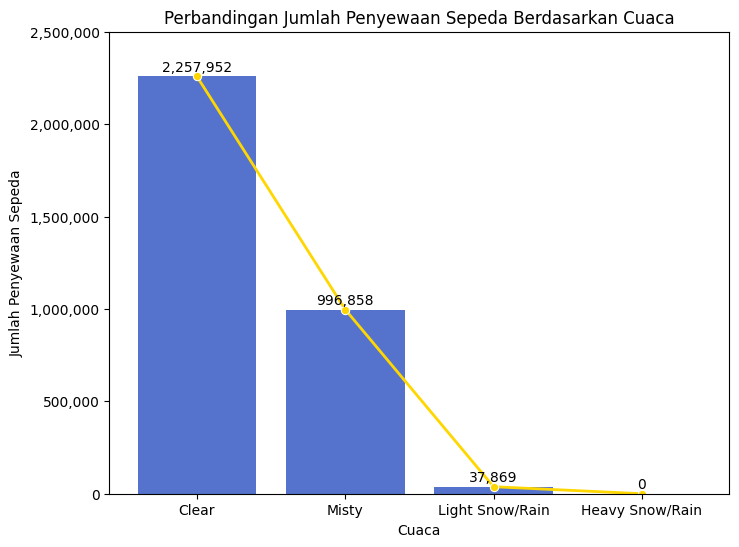

In [103]:
weather_sum = day_df.groupby(by="weathersit").cnt.sum().reset_index()

if 4 not in weather_sum['weathersit'].values:
    weather_sum = pd.concat([weather_sum, pd.DataFrame({'weathersit': [4], 'cnt': [0]})])

weather_map = {1: 'Clear', 2: 'Misty', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'}
weather_sum['weathersit'] = weather_sum['weathersit'].replace(weather_map)

weather_sum = weather_sum.sort_values(by='cnt', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='weathersit', y='cnt', data=weather_sum, color="royalblue")

plt.title('Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 30000, f'{int(p.get_height()):,}', ha='center')

plt.ylim(0, 2500000)
plt.yticks(range(0, 2500001, 500000), [f'{x:,}' for x in range(0, 2500001, 500000)])

sns.lineplot(data=weather_sum, x='weathersit', y='cnt', marker='o', color='gold', linewidth=2, ax=ax)
plt.show()

**Insight:**
- Dari perbandingan visualisasi berikut kita dapat mengetahui bahwa penyewa cenderung menyewa sepeda pada cuaca yang baik(cuaca clear) dan cenderung tidak menyewa jika cuacanya semakin buruk.

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda setiap harinya?

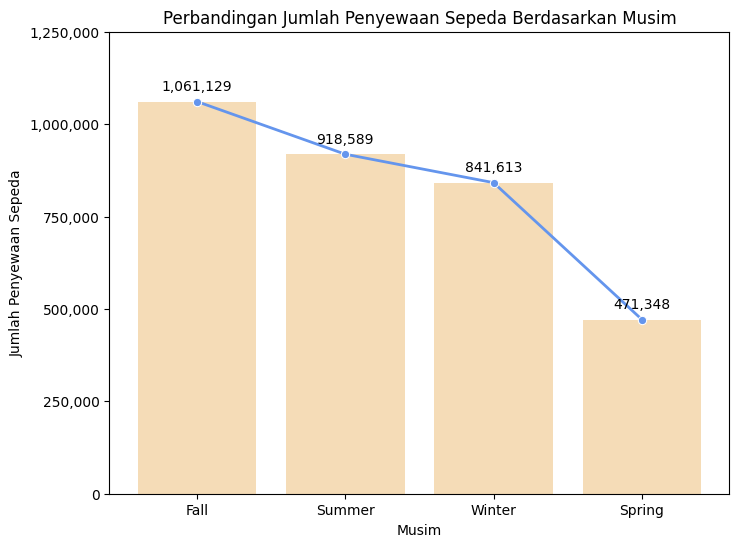

In [104]:
season_sum = day_df.groupby(by="season").cnt.sum().reset_index()
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_sum['season'] = season_sum['season'].replace(season_map)


season_sum = season_sum.sort_values(by='cnt', ascending=False).reset_index(drop=True)


plt.figure(figsize=(8,6))
ax = sns.barplot(x='season', y='cnt', data=season_sum, color="navajowhite")

plt.title('Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 30000, f'{int(p.get_height()):,}', ha='center')

plt.ylim(0, 1250000)
plt.yticks(range(0, 1250001, 250000), [f'{x:,}' for x in range(0, 1250001, 250000)])

sns.lineplot(data=season_sum, x='season', y='cnt', marker='o', color='cornflowerblue', linewidth=2, ax=ax)
plt.show()

**Insight:**
- Seperti yang dapat kita lihat pengguna cenderung menyewa sepeda pada musim fall kemudian semakin menurun pada musim summer, lalu winter, dan penyewa relatif paling sedikit menyewa pada musim spring.

### Pertanyaan 3: Seberapa besar jarak rasio perbandingan antara seseorang yang memilih untuk menyewa pada hari kerja dan hari libur?

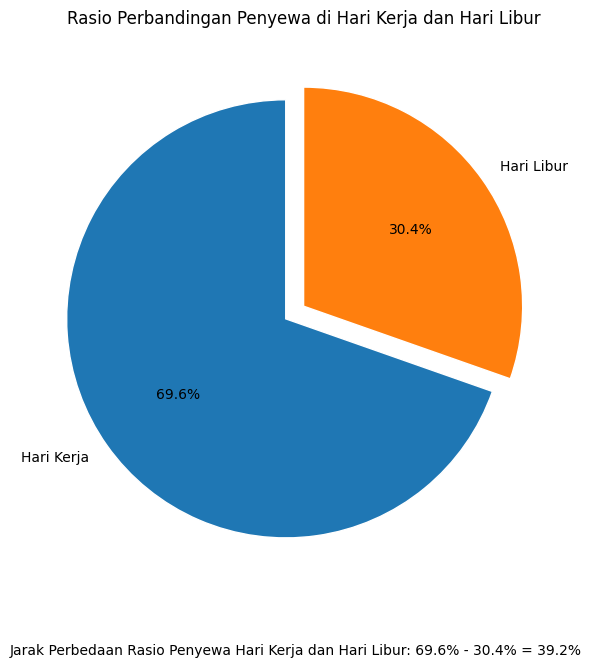

In [105]:
workingday_sum = day_df.groupby(by="workingday").agg({"cnt": "sum"}).sort_values(by="cnt", ascending=False).reset_index()

total_workingday = workingday_sum.loc[workingday_sum['workingday'] == 1, 'cnt'].values[0]
total_nonworkingday = workingday_sum.loc[workingday_sum['workingday'] == 0, 'cnt'].values[0]

data = [total_workingday, total_nonworkingday]
labels = ['Hari Kerja', 'Hari Libur']
explode = (0.1, 0)

total = total_workingday + total_nonworkingday
persentase_workingday = (total_workingday / total) * 100
persentase_nonworkingday = (total_nonworkingday / total) * 100

plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'}, explode=explode)
plt.title('Rasio Perbandingan Penyewa di Hari Kerja dan Hari Libur')
plt.figtext(0.5, -0.1, f"Jarak Perbedaan Rasio Penyewa Hari Kerja dan Hari Libur: {persentase_workingday:.1f}% - {persentase_nonworkingday:.1f}% = {(persentase_workingday-persentase_nonworkingday):.1f}%",
            ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Insight:

- Seperti yang dapat kita lihat pada gambar visualisasi diatas terdapat perbedaan persentase yang cukup besar antara penyewa yang menyewa sepeda di hari kerja dengan penyewa yang menyewa sepeda di hari libur yakni sebesar 39.2%.

### Pertanyaan 4: Kapan waktu penyewaan sepeda paling ramai dan sepi pengguna dalam sehari?

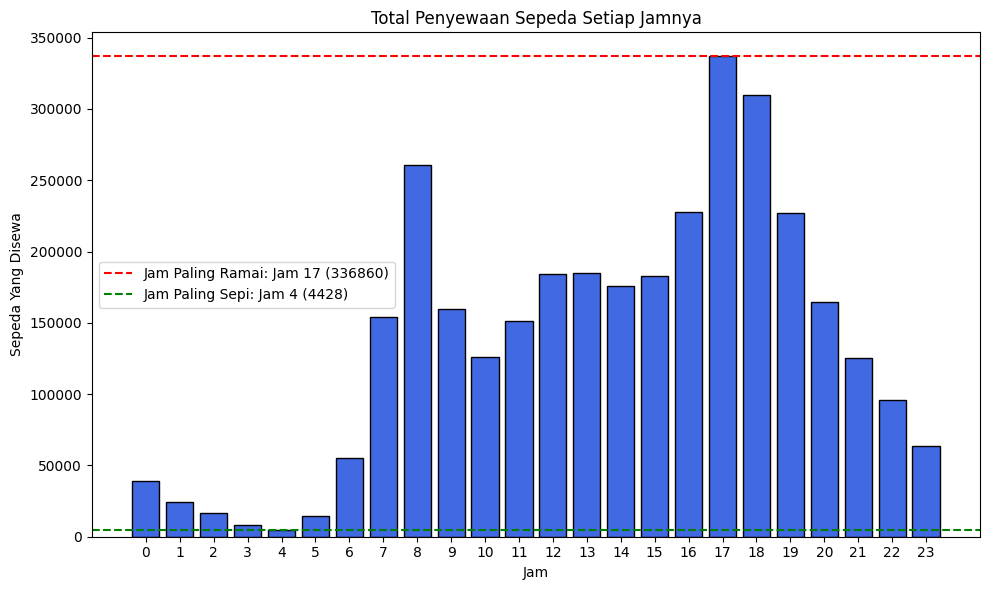

In [106]:
hour_sum = hour_df.groupby(by="hr").agg({"cnt": "sum"}).reset_index()


jam_ramai = hour_sum.loc[hour_sum['cnt'].idxmax()]
jam_sepi = hour_sum.loc[hour_sum['cnt'].idxmin()]
plt.figure(figsize=(10, 6))
plt.bar(hour_sum['hr'], hour_sum['cnt'], color='royalblue', edgecolor='black')


plt.axhline(y=jam_ramai['cnt'], color='red', linestyle='--',
            label=f'Jam Paling Ramai: Jam {int(jam_ramai["hr"])} ({jam_ramai["cnt"]})')
plt.axhline(y=jam_sepi['cnt'], color='green', linestyle='--',
            label=f'Jam Paling Sepi: Jam {int(jam_sepi["hr"])} ({jam_sepi["cnt"]})')


plt.title('Total Penyewaan Sepeda Setiap Jamnya')
plt.xlabel('Jam')
plt.ylabel('Sepeda Yang Disewa')

plt.xticks(hour_sum['hr'])
plt.legend()
plt.tight_layout()
plt.show()

Insight:

- Seperti yang dapat kita lihat pada gambar visualisasi diatas, sepeda cenderung ramai disewa pada jam pulang kerja yakni puncaknya pada jam 17 sedangkan pada dini hari sepeda cenderung sepi penyewa yakni dengan puncaknya pada jam 4

## Analisis Lanjutan (Opsional)

**RFM Analysis**

In [107]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({'dteday': lambda x: (current_date - x.max()).days,'instant': 'count','cnt': 'sum'}).reset_index()

rfm_df.columns = ['Registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   Registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


**Insight:**
- Pada RFM analisis kali ini kita akan mencoba memahami perilaku penyewa sepeda dengan 3 faktor utama. Yang pertama ialah parameter recency yang mengacu pada kapan terakhir kali penyewa berinteraksi dengan bisnis kita. Selanjutnya ialah parameter frekuensi yang mengacu pada berapa banyak penyewa sepeda yang melakukan transaksi. Kemudian yang terakhir ialah parameter monetary yang mengacu pada seberapa besar revenue yang diberikan oleh penyewa sepeda.

## Conclusion

**Pertanyaan**
1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda setiap harinya?
2. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda setiap harinya?
3. Seberapa besar jarak rasio perbandingan antara seseorang yang memilih untuk menyewa pada hari kerja dan hari libur?
4. Kapan waktu penyewaan sepeda paling ramai dan sepi pengguna dalam sehari?

**Jawaban**
1. Berdasarkan hasil data yang telah kita olah didapatkan bahwa cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda. Penyewa sepeda cenderung memilih untuk menyewa sepeda pada saat cuaca sedang cerah(clear/1) dan penyewaan sepeda cenderung untuk tidak menyewa sepeda apabila cuacanya semakin buruk, hal ini dapat kita lihat pada puncaknya di cuaca yang paling buruk yakni heavy snow/rain(4) yang total penyewaannya ialah 0 orang(tidak ada yang menyewa), tentu hal ini sangat jauh berbeda dengan total penyewaan sepeda yang didapat pada saat cuaca sedang cerah yang total penyewaannya bisa mencapai 2.257.952 orang. Tentu dengan mengetahui hal tersebut kita dapat meningkatkan strategi bisnis kita untuk memaksimalkan penyewaan sepeda disaat hari sedang cerah.

2. Berdasarkan hasil data yang telah kita olah didapatkan bahwa musim juga berpengaruh terhadap jumlah penyewaan sepeda. Penyewa sepeda cenderung memilih untuk menyewa sepeda pada saat musim gugur(fall) dan cenderung menurun pada saat musim panas(summer), lalu menurun lagi di musim dingin(winter), dan puncaknya yang paling rendah ada di musim semi(spring). Walaupun musim juga berpengaruh terhadap jumlah penyewaan sepeda, namun faktor musim tidak terlalu sesignifikan faktor cuaca, yang mana pada musim dengan penyewaan sepeda yang paling rendah juga penyewanya masih terhitung tinggi yakni dengan 471.348 penyewa. Sehingga mengetahui bahwa kita dapat memaksimalkan bisnis penyewaan sepeda kita dengan cara memaksimalkan layanan penyewaan sepeda dihari yang cerah(clear) pada musim gugur(fall).

3. Berdasarkan hasil data yang telah kita olah didapatkan bahwa adanya jarak yang cukup besar diantara rasio dari persentase perbandingan penyewaan sepeda di hari libur dan di hari kerja, yang mana di hari libur penyewa hanya menyumbang persentase penyewaan sebesar 30.4% saja sedangkan pada hari kerja penyewa memiliki persentase penyewaan yang jauh lebih besar yakni di angka 69.6%(dua kali lipat lebih besar dibandingkan hari libur). Sehingga dapat kita ketahui bahwa penyewaan sepeda lebih optimal dilakukan pada hari kerja karena gap penyewaan diantara hari kerja dan hari libur cukup jauh yakni disekitar 39.2%)

4. Berdasarkan hasil data yang telah kita olah didapatkan bahwa waktu penyewaan sepeda paling ramai ada disekitar jam 17 dan paling sepi ada disekitar jam 4.


***Sehingga dari jawaban pertanyaan-pertanyaan tersebut dapat kita menyimpulkan bahwa kita bisa memaksimalkan bisnis penyewaan sepeda kita dengan cara meningkatkan layanan penyewaan pada saat musim gugur, cuaca cerah, hari kerja dan di jam pulang kerja yakni sekitar jam 17.***